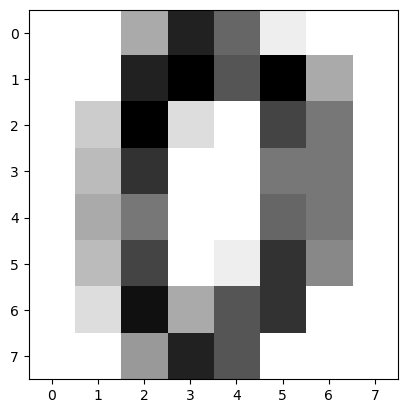

In [15]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits= datasets.load_digits()
plt.imshow(digits.images[0], cmap= plt.cm.gray_r, interpolation= 'nearest')

In [21]:
X= digits.data

In [22]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [23]:
Y= digits.target

In [28]:
X.shape

(1797, 64)

In [29]:
Y= pd.get_dummies(Y).values

In [31]:
n_samples= len(digits.images)
data= digits.images.reshape((n_samples, -1))

In [32]:
X_train, X_test, y_train, y_test= train_test_split(
    data, digits.target, test_size= 0.2)

from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)

scores= metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9888888888888889


[8]


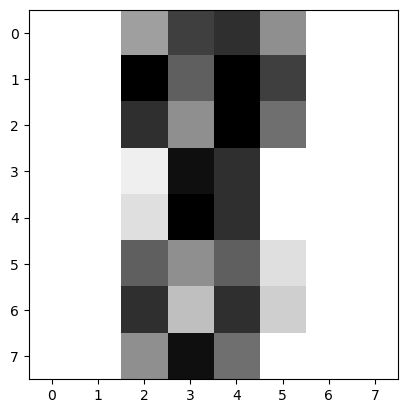

In [33]:
plt.imshow(X_test[10].reshape(8,8), cmap= plt.cm.gray_r, interpolation= 'nearest')
y_pred= knn. predict([X_test[10]])
print(y_pred)

In [35]:
model = Sequential()
model.add(Dense(10, input_shape=(64,), activation='relu'))  
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(10, activation='softmax'))  

# 옵티마이저 수정
model.compile(optimizer=Adam(learning_rate=0.04), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │            70 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 862 (3.37 KB)

 Trainable params: 862 (3.37 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding 적용
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

# 모델 컴파일 (One-hot encoding을 했으므로 categorical_crossentropy 사용)
model.compile(optimizer=Adam(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습 (One-hot encoded labels 사용)
model_history = model.fit(
    x=X_train, 
    y=y_train_categorical,  
    epochs=30, 
    batch_size=32,
    validation_data=(X_test, y_test_categorical)
)

# 예측 수행
y_pred = model.predict(X_test)

# 클래스 변환 (원래 형식 유지)
y_test_class = np.argmax(y_test_categorical, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1005 - loss: 2.3103 - val_accuracy: 0.0861 - val_loss: 2.3103
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1061 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1137 - loss: 2.3051 - val_accuracy: 0.0861 - val_loss: 2.3112
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1147 - loss: 2.3046 - val_accuracy: 0.0972 - val_loss: 2.3058
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0952 - loss: 2.3062 - val_accuracy: 0.0861 - val_loss: 2.3135
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1033 - loss: 2.3049 - val_accuracy: 0.0889 - val_loss: 2.3041
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0986 - loss: 2.3069 - val_accuracy: 0.0722 - val_loss: 2.3123
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1042 - loss: 2.3047 - val_accuracy: 0.1139 - val_loss:

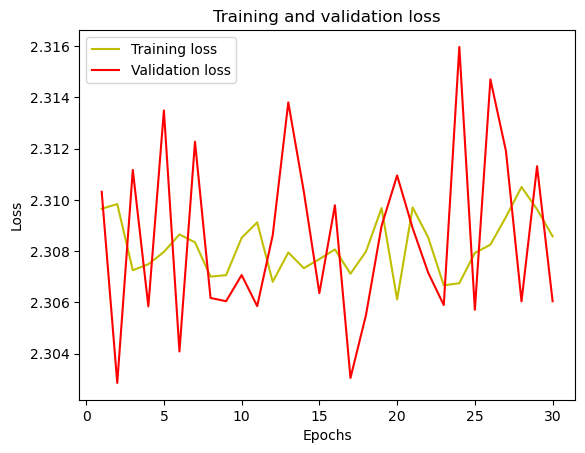

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

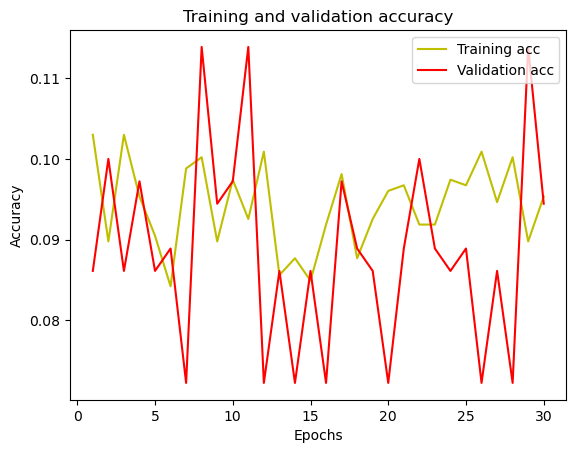

In [44]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()